In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import logging

In [2]:
logging.basicConfig(level=logging.INFO)

In [3]:
input_csv = 'csv/output.csv'
df = pd.read_csv(input_csv)
logging.info(df.head())

INFO:root:   id                                               text  class
0   1  accountant summary financial accountant specia...      0
1   2  staff accountant summary highly analytical det...      0
2   3  accountant professional summary obtain positio...      0
3   4  senior accountant experience company june 2011...      0
4   5  senior accountant professional summary senior ...      0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.33, random_state=None)

In [5]:
def train_naive_bayes(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', MultinomialNB())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [6]:
def train_random_forest(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', RandomForestClassifier())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [7]:
def train_bernoulli(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', BernoulliNB())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [8]:
def train_logistic_regression(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', LogisticRegression(max_iter=1000))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [9]:
def train_knn(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('vect', CountVectorizer()), 
        ('clf', KNeighborsClassifier(n_neighbors=7)) 
    ])
    pipeline.fit(X_train, y_train) 
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [13]:
def plot_accuracies(accuracies):
  models = list(accuracies.keys())
  acc_values = list(accuracies.values())
  num_models = len(models)
  cmap = plt.cm.tab10 
  colors = cmap(np.arange(len(models)) % cmap.N)

  plt.figure(figsize=(10, 8))
  bars = plt.bar(models, acc_values, color=colors)
  for bar, acc in zip(bars, acc_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=8)

  plt.ylabel('Acurácia')
  plt.ylim([0, 1])
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [11]:
knn_accuracy = train_knn(X_train, y_train, X_test, y_test)
nb_accuracy = train_naive_bayes(X_train, y_train, X_test)
rf_accuracy = train_random_forest(X_train, y_train, X_test)
lr_accuracy = train_logistic_regression(X_train, y_train, X_test)
br_accuracy = train_bernoulli(X_train, y_train, X_test)

accuracies = {
    'Naive Bayes': nb_accuracy,
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    'Bernoulli': br_accuracy,
    'KNN = 7': knn_accuracy
}

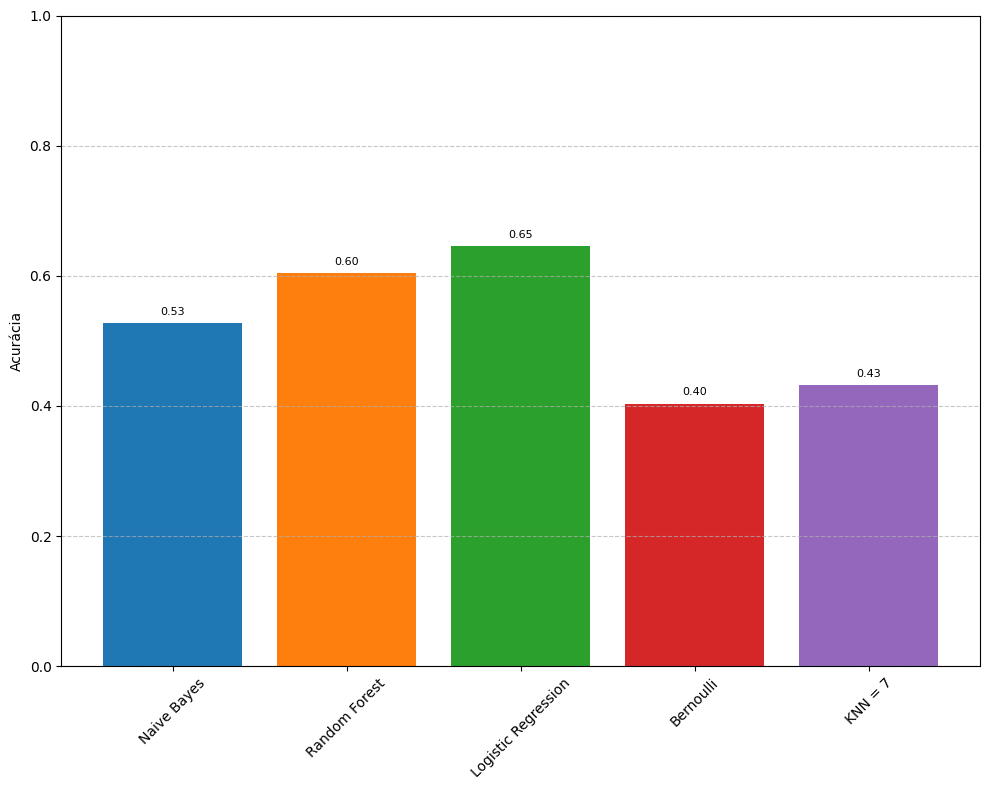

In [14]:
plot_accuracies(accuracies)